# Visualizacion y analisis de datos de cultivos

En este Notebook vamos a visualizar y analizar un conjunto de datos sobre agricultura de precision, donde se presenta las caracteristicas del suelo y del clima recomendadas para distintos tipos de cultivo.

<img src='util/crops.jpg'>

Primero importamos las librerias que vamos a necesitar

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Despues importamos los datos de un archivo Excel a un DataFrame de Pandas.

In [2]:
crops = pd.read_excel('datos/Crop_recommendation.xlsx')

Ahora vamos a visualizar las 5 primeras lineas de datos para tener una idea de que datos estan disponibles.

In [3]:
crops.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Por lo que vemos la columna 'label' corresponde al nombre del cultivo, vamos a intentar visualizar solo dicha columna para poder  ver que cultivos estan disponibles.

In [4]:
crops['label']

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

Como solo nos muestra las primeras y utlimas lineas de datos vamos a decirle a Pandas que solo nos de los valores unicos de esa columna.

In [5]:
crops['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Y ahora contamos cuantas filas de datos (combinaciones de valores recomendados de N, K, P, Temperature,...)  tenemos para cada cultivo.

In [6]:
crops['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Sabemos que nuestro suelo tiene un PH por debajo de 6, asi que vamos a intentar encontrar que cultivos tienen recomendaciones con valores mas bajos de PH. Para ello vamos a visualizar con un diagrama de caja y bigotes de la libreria Seaborn.

<AxesSubplot:xlabel='label', ylabel='ph'>

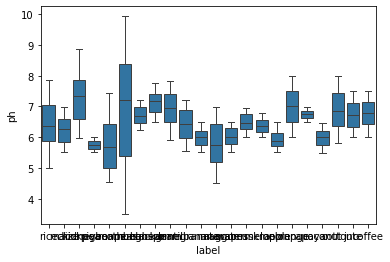

In [7]:
sns.boxplot(x='label',y='ph',data=crops)

Tenemos un problema, no podemos ver bien el eje x donde esta el nombre de los cultivos. Asi que decidimos hacer la grafica mas grande. Para ello utilizamos la funcion `figure` de Matplotlib. Y ademas rotamos e incrementamos el tamaño de letra en el eje x. Para esto ultimo utilizamos la funcion `xticks`

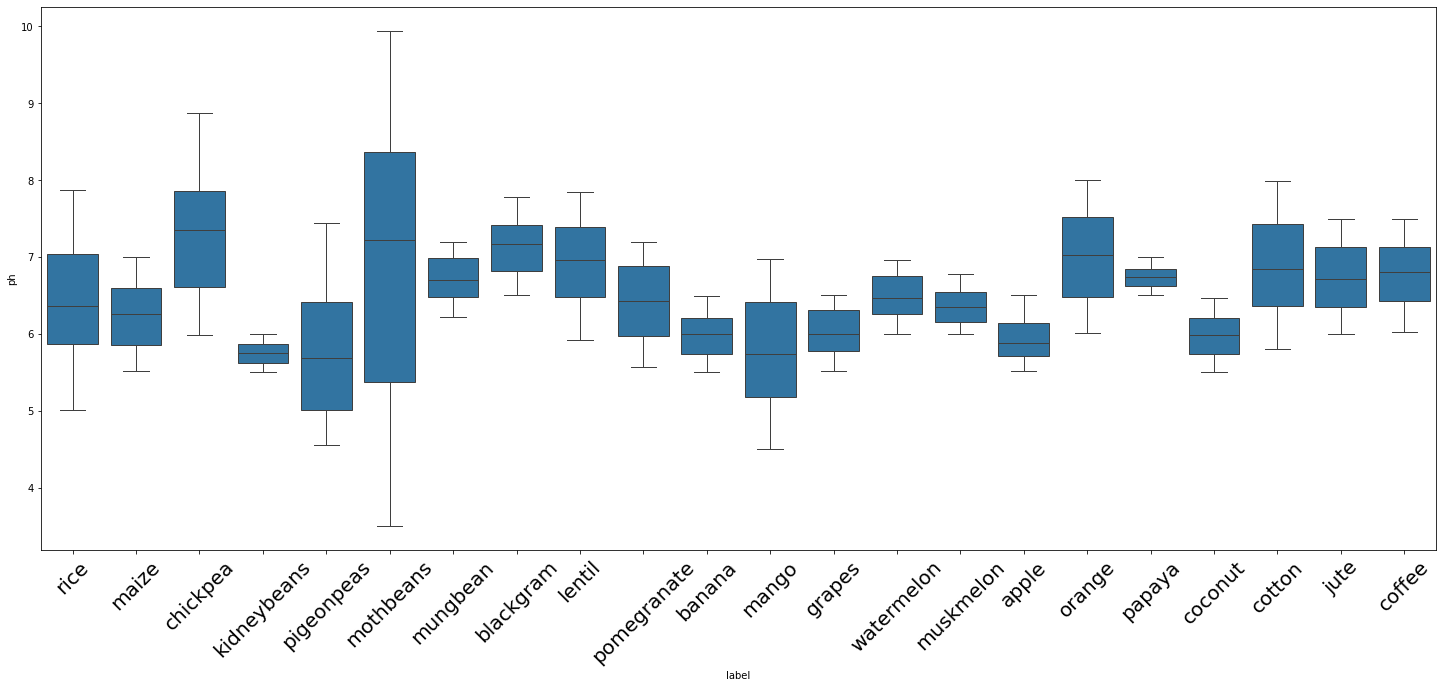

In [8]:
plt.figure(figsize=(25,10))
sns.boxplot(x='label',y='ph',data=crops)
plt.xticks(rotation=45, fontsize = 20)
plt.show()

Parece que dados sus bajos valores de PH y su baja variabilidad, kidneybeans es nuestra mejor opcion.

Podemos crear una grafica similar pero ahora con un diagrama de violin.

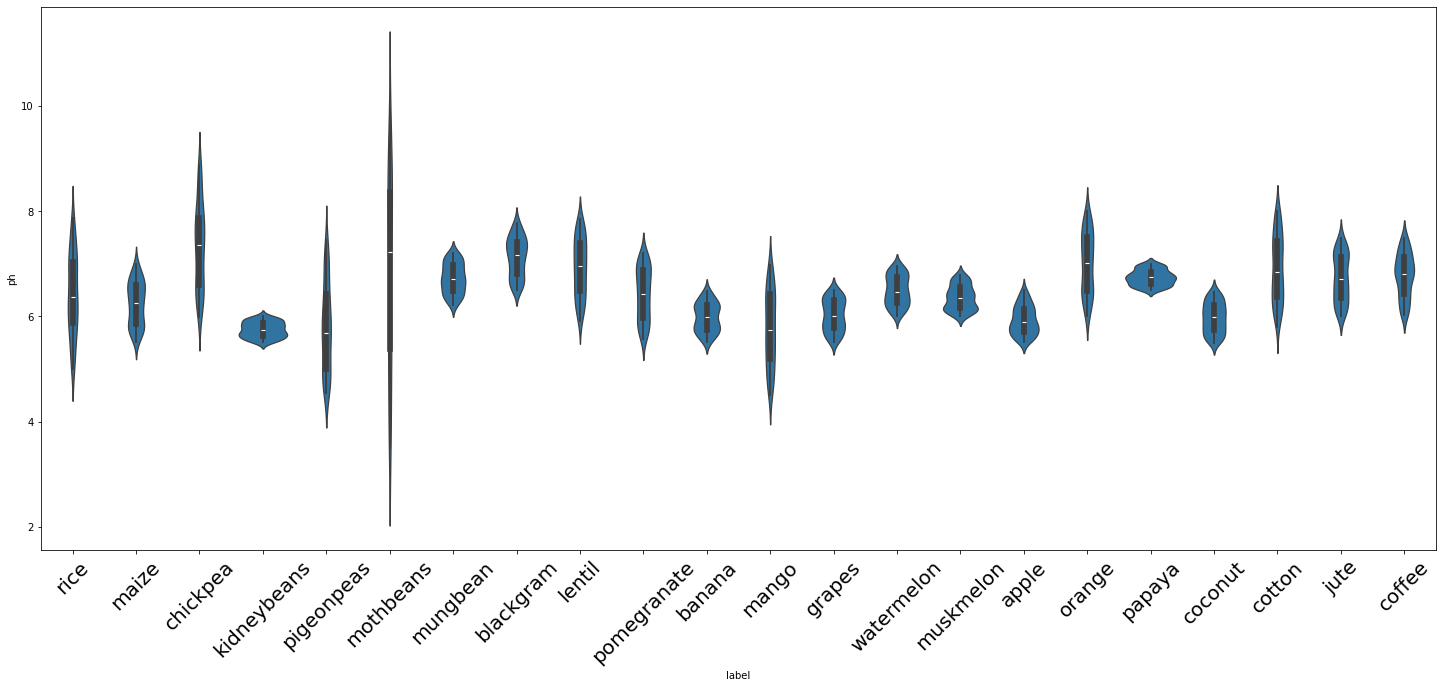

In [9]:
plt.figure(figsize=(25,10))
sns.violinplot(x='label',y='ph',data=crops)
plt.xticks(rotation=45, fontsize = 20)
plt.show()

O con una nube de puntos.

C:\Users\Usuario\anaconda3\envs\CursoPython\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\CursoPython\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\CursoPython\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\CursoPython\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\env

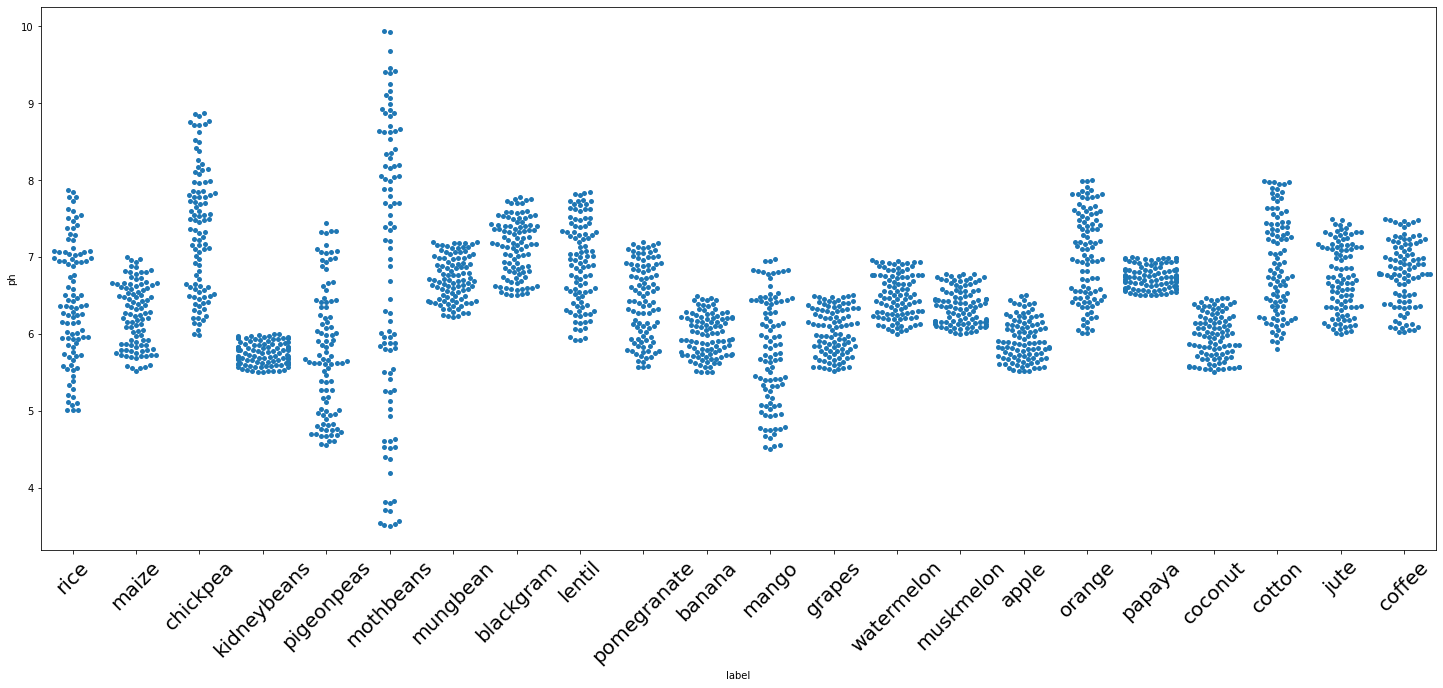

In [10]:
fig, ax = plt.subplots(figsize=(25,10))
sns.swarmplot(x='label',y='ph',data=crops)
plt.xticks(rotation=45, fontsize = 20)
plt.show()

### Buscar la correlacion entre datos
Con Pandas podemos generar facilmente una tabla con la correlacion entre los distintos datos.

In [24]:
crops.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Podemos cambiar el metodo usado para calcular la correlacion.

In [25]:
crops.corr(method = 'spearman')

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.162625,0.208248,0.022390,0.061113,0.141879,0.011411
P,-0.162625,1.000000,0.195161,-0.137618,-0.309246,-0.119063,-0.032457
K,0.208248,0.195161,1.000000,-0.081082,0.279493,-0.155351,0.069903
temperature,0.022390,-0.137618,-0.081082,1.000000,0.124172,0.027754,-0.152028
humidity,0.061113,-0.309246,0.279493,0.124172,1.000000,-0.007281,0.100731
ph,0.141879,-0.119063,-0.155351,0.027754,-0.007281,1.000000,-0.151280
rainfall,0.011411,-0.032457,0.069903,-0.152028,0.100731,-0.151280,1.000000


O calcular la correlacion solo para los datos que cumplan una cierta condicion, por ejemplo que el ph<6.

In [13]:
crops[crops['ph']<6].corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.029410,-0.146067,0.044838,0.253152,0.178088,0.151718
P,-0.029410,1.000000,0.831575,-0.241403,0.173452,0.193758,-0.240044
K,-0.146067,0.831575,1.000000,-0.128723,0.521717,0.215971,-0.176143
temperature,0.044838,-0.241403,-0.128723,1.000000,0.134269,-0.277654,-0.001439
humidity,0.253152,0.173452,0.521717,0.134269,1.000000,0.178613,0.221574
ph,0.178088,0.193758,0.215971,-0.277654,0.178613,1.000000,0.087705
rainfall,0.151718,-0.240044,-0.176143,-0.001439,0.221574,0.087705,1.000000


Podemos tambien intentar encontrar visualment si hay alguna correlacion entre por ejemplo las caracteristicas del suelo y del clima para los distintos cultivos (en distintos colores).

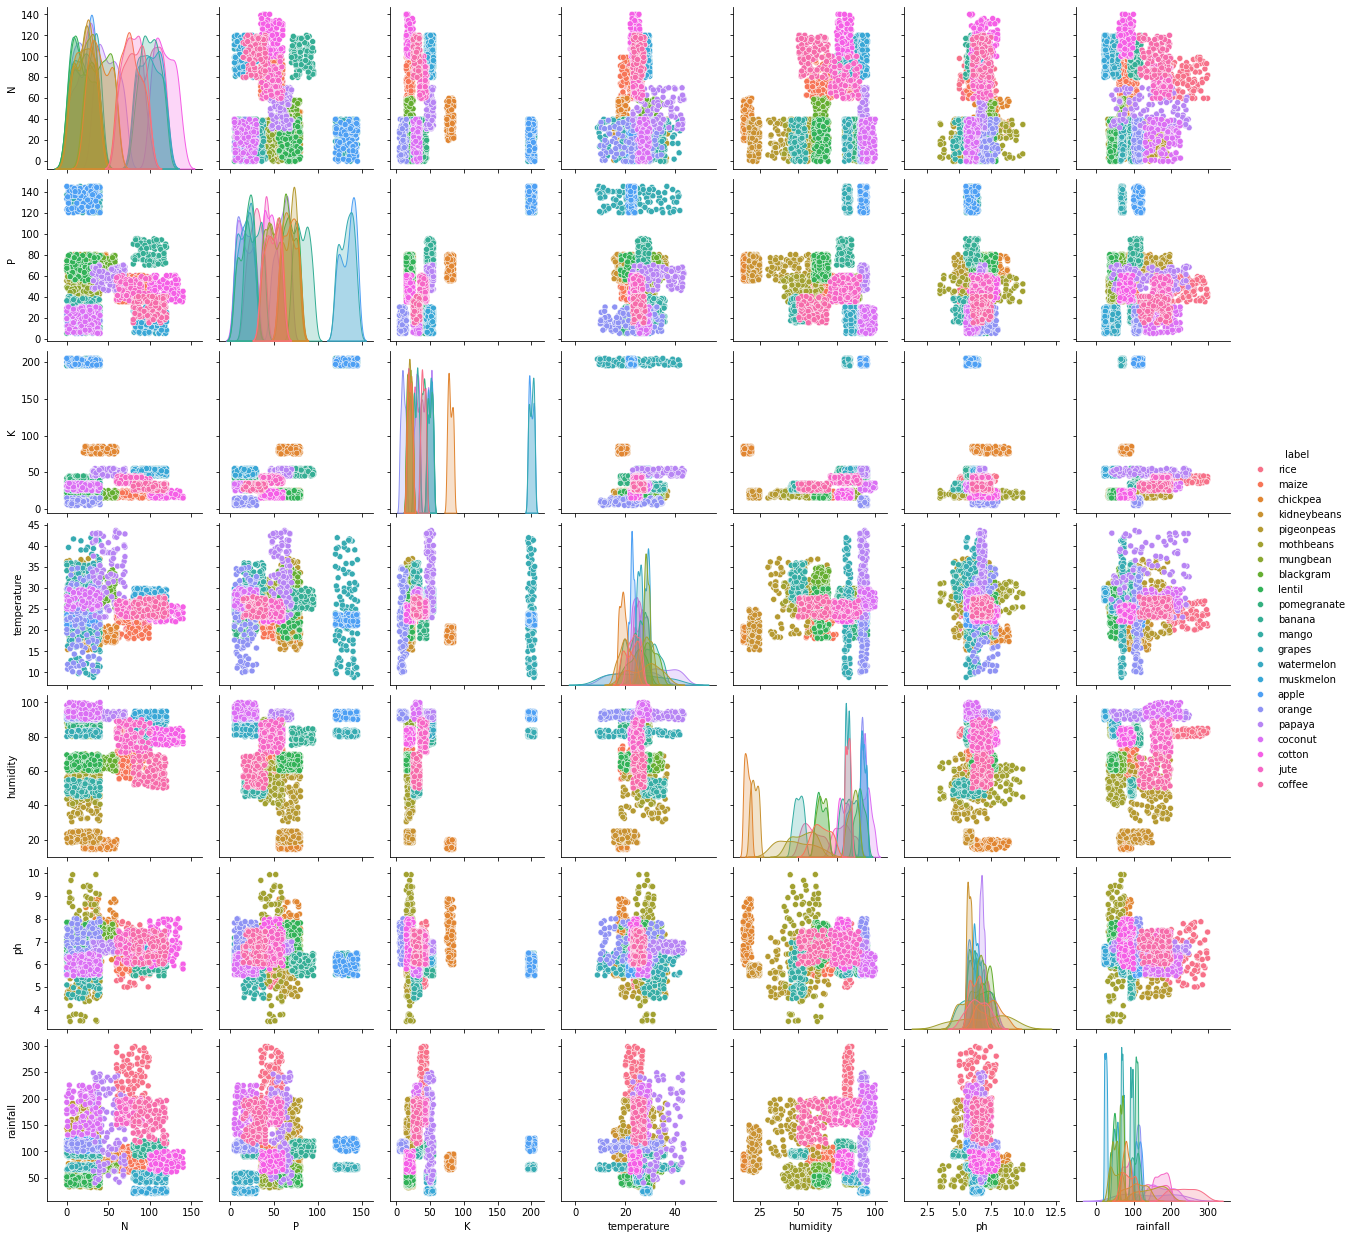

In [14]:
sns.pairplot(data=crops, hue = 'label')

Igualmente podemos visualizar solo los datos que cumplan una condicion. De nuevo aplicamos la condicion de que ph<6

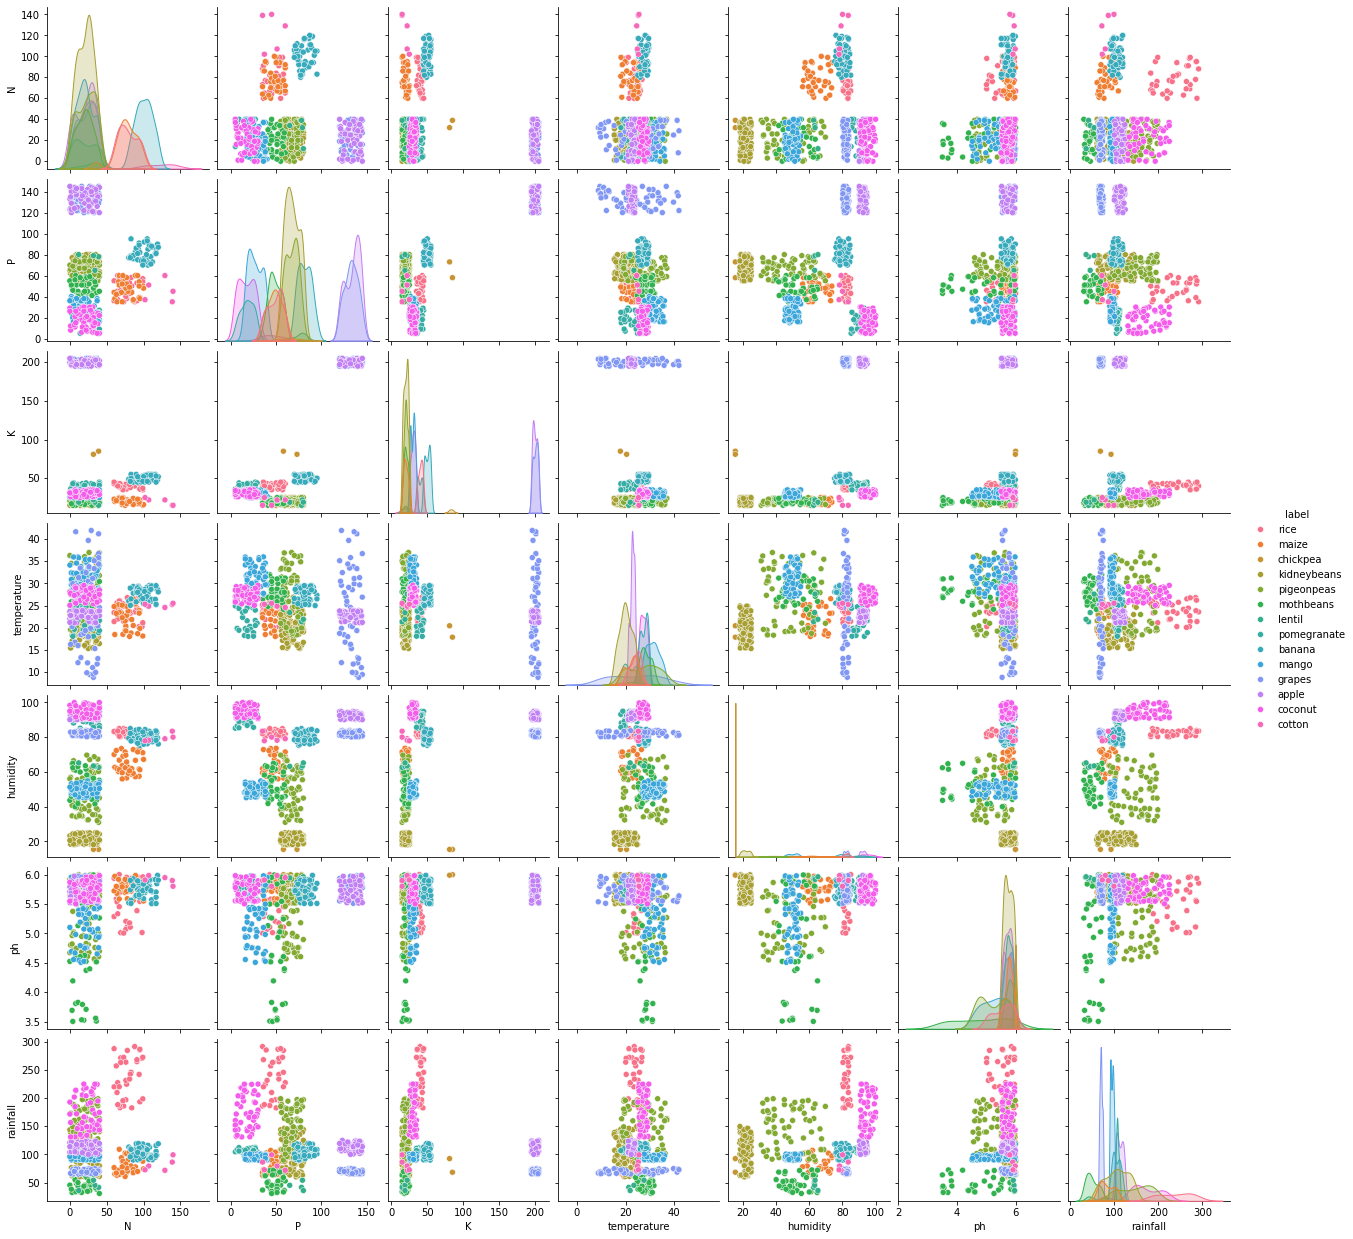

In [15]:
sns.pairplot(data=crops[crops['ph']<6], hue = 'label', )

Podemos fijarnos en la correlacion entre solo K y rainfall por ejemplo.

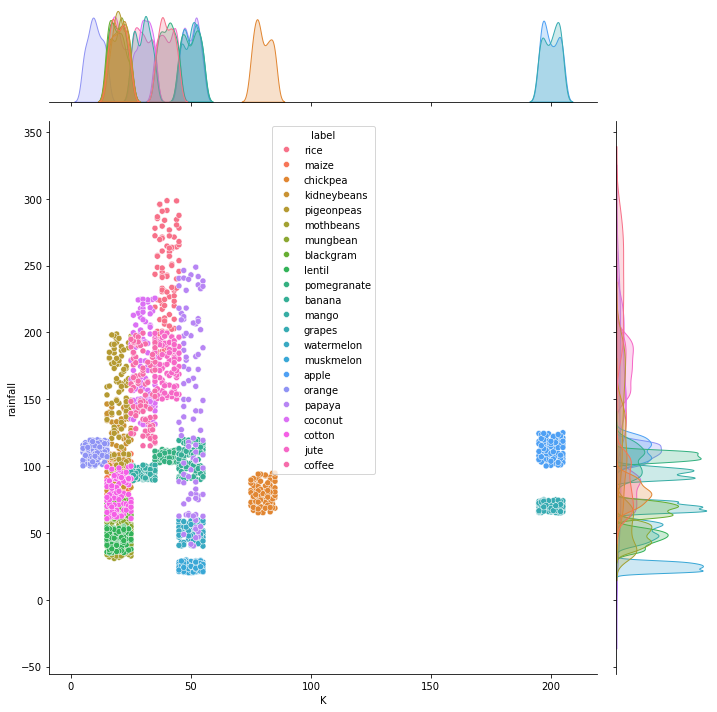

In [16]:
sns.jointplot(x="K",y="rainfall",data=crops,height=10,hue="label")

Si queremos podemos extraer solo los datos correspondientes a uno de los cultivos, por ejemplo kidneybeans

In [17]:
crops[crops['label']=='kidneybeans']

,N,P,K,temperature,humidity,ph,rainfall,label
300,13,60,25,17.136928,20.595417,5.685972,128.256862,kidneybeans
301,25,70,16,19.634743,18.907056,5.759237,106.359818,kidneybeans
302,31,55,22,22.913502,21.339531,5.873172,109.225556,kidneybeans
303,40,64,16,16.433403,24.240459,5.926677,140.371781,kidneybeans
304,2,61,20,22.139747,23.022511,5.955617,76.641283,kidneybeans
...,...,...,...,...,...,...,...,...
395,27,65,18,20.109938,23.223238,5.595032,73.363865,kidneybeans
396,30,63,16,23.605066,21.905396,5.525905,100.597873,kidneybeans
397,37,70,25,19.731369,24.894874,5.819404,84.063541,kidneybeans
398,27,63,19,20.934099,21.189301,5.562202,133.191442,kidneybeans


Generar automaticamente los valores medios, extremos, quartiles...

In [18]:
crops[crops['label']=='kidneybeans'].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.750000,67.540000,20.050000,20.115085,21.605357,5.749411,105.919778
std,10.834266,7.571104,3.102215,2.599573,2.167323,0.145220,26.111384
min,0.000000,55.000000,15.000000,15.330426,18.092240,5.502999,60.275525
25%,11.750000,61.000000,17.000000,18.294621,19.735894,5.624995,85.824741
50%,22.000000,67.000000,20.000000,19.924037,21.348735,5.745283,107.399392
75%,28.000000,74.000000,22.250000,22.003187,23.357184,5.868351,129.399964
max,40.000000,80.000000,25.000000,24.923601,24.969699,5.998125,149.744103


Los datos extraidos de dicho cultivo lo podemos asignar a un nuevo dataframe, que por ejemplo se llame como el cultivo.

In [19]:
kidneybeans = crops[crops['label']=='kidneybeans']

Y de nuevo calcular la correlacion entre datos pero ahora solo para kidneybeans

In [20]:
kidneybeans.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.022843,-0.083774,-0.057830,-0.026898,-0.033444,-0.093714
P,-0.022843,1.000000,-0.052339,0.074207,-0.003629,0.057704,-0.281031
K,-0.083774,-0.052339,1.000000,-0.049679,-0.027733,0.047271,-0.025536
temperature,-0.057830,0.074207,-0.049679,1.000000,0.035867,0.108404,-0.077098
humidity,-0.026898,-0.003629,-0.027733,0.035867,1.000000,0.029719,-0.094343
ph,-0.033444,0.057704,0.047271,0.108404,0.029719,1.000000,0.073747
rainfall,-0.093714,-0.281031,-0.025536,-0.077098,-0.094343,0.073747,1.000000


O generar un grafico, de dichas correlaciones con distintas tonalidades de color segun el grado de correlacion.

<AxesSubplot:>

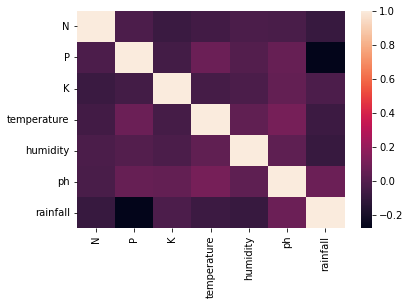

In [21]:
sns.heatmap(kidneybeans.corr())